2022-06-21 <br/>
Juneteenth<br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-06-21

Bubble Chart - Completed  <br/>
Bubble Chart with dynamic scaling - Completed 

In [66]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default="jupyterlab"
import os

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-06-21/census.csv')

In [68]:
df.head()

,region,division,year,total,white,black,black_free,black_slaves
0,USA Total,NaN,1870,38558371,33589377,4880009,4880009,0
1,USA Total,NaN,1860,31443321,26922537,4441830,488070,3953760
2,USA Total,NaN,1850,23191876,19553068,3638808,434495,3204313
3,USA Total,NaN,1840,17063353,14189705,2873648,386293,2487355
4,USA Total,NaN,1830,12860702,10532060,2328642,619599,1709043


In [69]:
# Total values 
df_grouped = df.groupby(['region','year']).sum().reset_index()

In [70]:
# Find the % of freed 
df_grouped['black_free_perc'] = df_grouped.apply(lambda x: round(x.black_free*100/x.black, 2),axis=1)

In [71]:
df_grouped.head()

,region,year,total,white,black,black_free,black_slaves,black_free_perc
0,Midwest,1800,102012,100742,1270,1000,270,78.74
1,Midwest,1810,584214,570346,13868,7260,6608,52.35
2,Midwest,1820,1718610,1682090,36520,13862,22658,37.96
3,Midwest,1830,3220946,3137860,83086,31328,51758,37.71
4,Midwest,1840,6703084,6524390,178694,61486,117208,34.41


In [72]:
fig = px.scatter(df_grouped, y="year", x="region",
                 size='black_free_perc',
                 title= "Percentage of Freed slave by region"
                 )
  
fig.show()

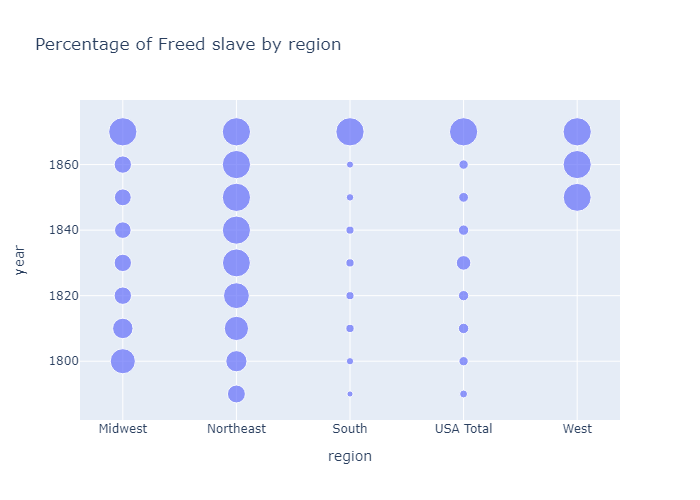

In [73]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [74]:
fig = go.Figure(data=[go.Scatter(
    x=df_grouped.region, y=df_grouped.year,
    mode='markers',
    marker_size=df_grouped.black_free_perc)
])
fig.update_layout(
    width=1000,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    title = "Percentage of Freed slave by region"
)

fig.show()

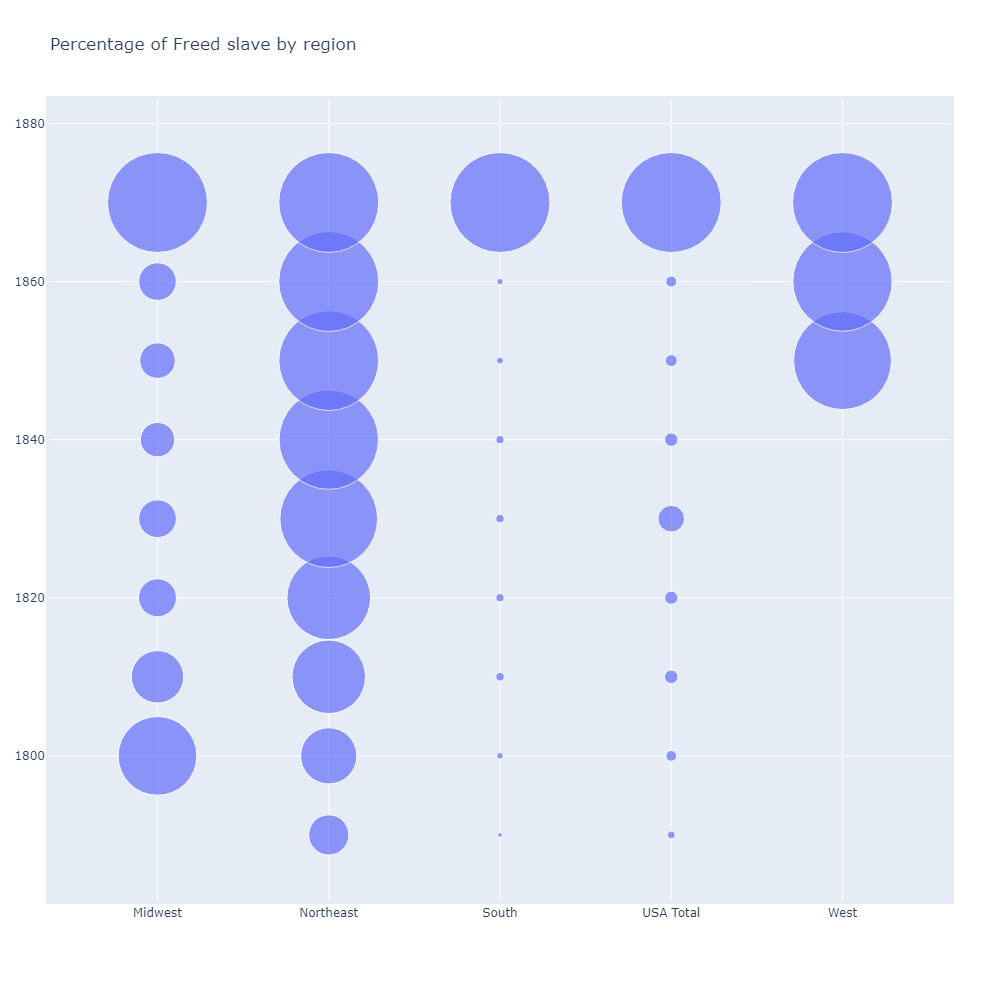

In [75]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [76]:


fig = go.Figure(data=[go.Scatter(
    x=df_grouped.region,
    y=df_grouped.year,
    mode='markers',
    marker=dict(
        size=df_grouped.black_free_perc,
        sizemode='area',
        sizeref=2.*max(df_grouped.black_free_perc)/(40.**2),
        sizemin=4 
    )
)])

fig.update_layout(
    width=600,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
    title = "Percentage of Freed slave by region"
)

fig.show()


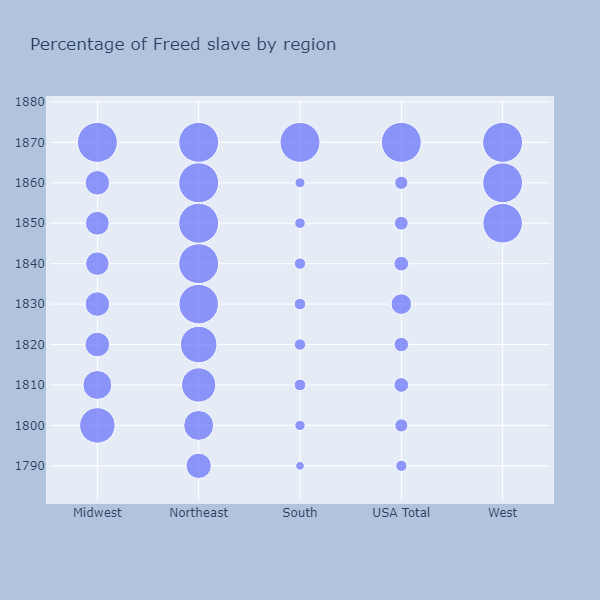

In [77]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)